In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [4]:
data.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

In [7]:
data.describe()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [9]:
data = data[data['Initial_Symptom'].isna()==False]
data = data[data['Schooling'].isna()==False]

In [10]:
data.Initial_EDSS.value_counts()

1.0    87
2.0    31
3.0     7
Name: Initial_EDSS, dtype: int64

In [11]:
data.Final_EDSS.value_counts()

1.0    80
2.0    34
3.0    11
Name: Final_EDSS, dtype: int64

In [12]:
data['Initial_EDSS'].fillna(method='ffill', inplace=True)
data['Final_EDSS'].fillna(method='ffill', inplace=True)

In [13]:
data.shape

(271, 19)

In [14]:
scaler= MinMaxScaler()
data['Initial_Symptom']= scaler.fit_transform(np.array(data.Initial_Symptom).reshape(-1,1))

In [15]:
data.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,0.071429,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,0.642857,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,0.142857,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,0.428571,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,0.357143,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [16]:
data['Initial_Symptom'] = data['Initial_Symptom'].round(2)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('group', axis=1), data.group, test_size=0.2, random_state=42)

In [18]:
logreg= LogisticRegression()

In [19]:
logreg.fit(X_train, y_train)

/Users/anastasiiashaparets/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8181818181818182


Text(50.722222222222214, 0.5, 'True Labels')

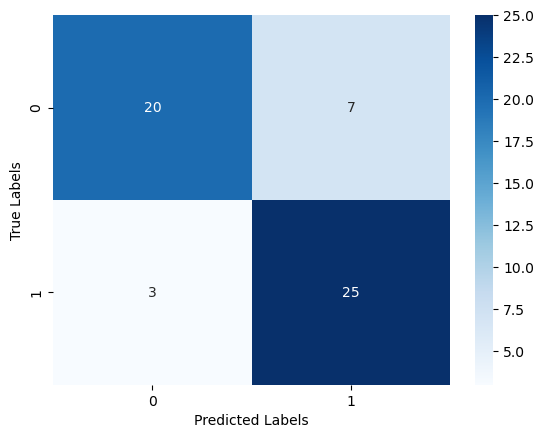

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X=data.drop(['group'], axis=1)
y=(data['group'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=23, stratify=y)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)
lr_score = model.score(X_test, y_test)

/Users/anastasiiashaparets/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.svm import SVC

model= SVC(kernel='linear')
model.fit(X_train, y_train)
svc_score = model.score(X_test, y_test)

In [30]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
ber_score = model.score(X_test, y_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=175, random_state=23)
model.fit(X_train, y_train)
rf_score = model.score(X_test, y_test)

In [32]:
score = {
    'Model_Name' :['Logistic Regression', 'SVC', 'Bernoulli NaiveBayes', 'Random Forest'], 
    'Score': [lr_score, svc_score, ber_score, rf_score]
}
score_data= pd.DataFrame(score)
score_data

,Model_Name,Score
0,Logistic Regression,0.866667
1,SVC,0.883333
2,Bernoulli NaiveBayes,0.800000
3,Random Forest,0.883333


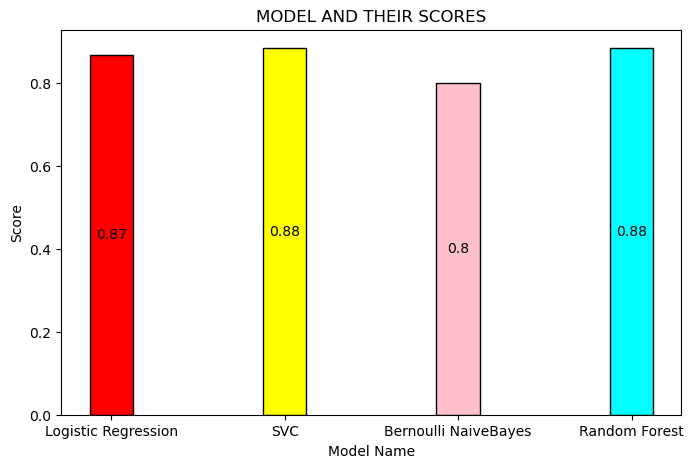

In [34]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(8,5))
barplot= plt.bar(score_data.Model_Name, score_data.Score, color=['red', 'yellow', 'pink', 'cyan'], edgecolor='black', width=0.25)
plt.bar_label(barplot, labels=round(score_data.Score,2), label_type='center')
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('MODEL AND THEIR SCORES')
plt.show()